<a href="https://colab.research.google.com/github/Hangowoon/Newjak_ex/blob/main/py3_nex05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. MNIST 데이터로드

- Modified National Institute of Standards and Technology database
- 데이터셋  
- 카테고리 0~9
- 학습데이터 60,000 / 테스트 데이터 10,000

In [1]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1. MNIST 로드
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(), #train 용으로 사용 
                        target_transform=None, download=True)

#2. 그려보기
# MNIST data 하나 형태 출력
image, lavel = mnist_train.__getitem__(0)
print (image.size(), lavel)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([1, 28, 28]) 5


In [9]:
imge, lavel = mnist_train[1]
print(image.size(), lavel)

torch.Size([1, 28, 28]) 0


In [10]:
print (mnist_train.__len__())
print ("mnist_train 길이 : ", len(mnist_train))

60000
mnist_train 길이 :  60000


In [11]:
#그리기
print (mnist_train[0][1])
print (mnist_train[0][0].size())

5
torch.Size([1, 28, 28])


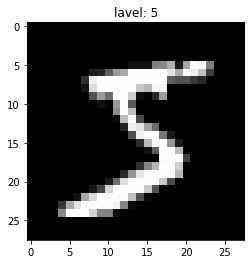

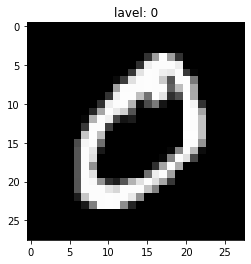

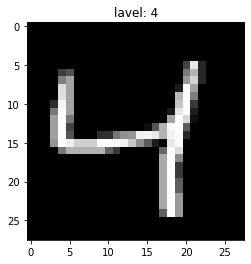

In [12]:
for i in range(3):
  img = mnist_train[i][0].numpy() #image 타입을 numpy로 변환(1,28,28)
  #print ("lavel:", mnist_train[i][1])
  plt.title("lavel: %d" %mnist_train[i][1])
  plt.imshow(img[0], cmap='gray')
  plt.show()

###1) MNIST train, test dataset 가져오기

In [13]:
# "": 현재 폴더에 MNIST 있음 
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(), #train 용으로 사용 
                        target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(), #test 용으로 사용 
                        target_transform=None, download=True)

###2) 대략적인 데이터 형태

In [14]:
print ("mnist_train 길이 :", len(mnist_train))
print ("mnist_test 길이 :", len(mnist_test))

mnist_train 길이 : 60000
mnist_test 길이 : 10000


In [15]:
#데이터 하나 형태 
image, lavel = mnist_train.__getitem__(0) # 번째 데이터
print ("image data 형태 : ", image.size())
print ("label : ", lavel)

image data 형태 :  torch.Size([1, 28, 28])
label :  5


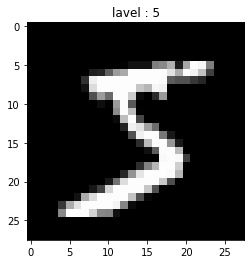

In [16]:
#그리기
img = image.numpy() # image타입을 numpy로 변환 (1,28,28)
plt.title("lavel : %d" %lavel)
plt.imshow(img[0], cmap='gray')
plt.show()

###3) 데이터 로드함수
- batch_size 단위로 끊어서 로드하기 위함
- GPU 용량 한계

In [7]:
batch_size = 16

In [5]:
import torch

In [17]:
train_loader = torch.utils.data.DataLoader((mnist_train), batch_size = batch_size, 
                                           shuffle = True, num_workers = 2,
                                           drop_last = True)
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size = batch_size, 
                                           shuffle = False, num_workers = 2,
                                           drop_last = True)

###4) 데이터 로드함수 이해하기

In [21]:
n = 3 #샘플로 그려볼 데이터 개수 
for i, [imgs, labels] in enumerate(test_loader): # batch_size 만큼
  if i>5:
    break 

  print ("[%d]" %i)
  print ("한 번에 로드되는 데이터 크기:", len(imgs))

[0]
한 번에 로드되는 데이터 크기: 16
[1]
한 번에 로드되는 데이터 크기: 16
[2]
한 번에 로드되는 데이터 크기: 16
[3]
한 번에 로드되는 데이터 크기: 16
[4]
한 번에 로드되는 데이터 크기: 16
[5]
한 번에 로드되는 데이터 크기: 16


In [26]:
  #GPU에 로드 
  x = variable(imgs)
  x = x.reshape((x.shape[0], x.shape[2], x.shape[3]))
  y_ = variable(labels)

  print (x.shape)
  print (y_.shape)

torch.Size([16, 28, 28])
torch.Size([16])


/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:298: UserWarning: torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead
  warnings.warn("torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead")
/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:299: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(*args, **kwargs)


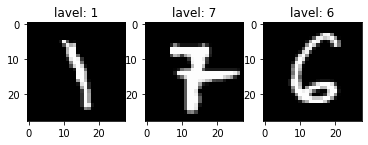

In [27]:
  #그리기
  for j in range(n):
    img = imgs[j].numpy()
    img = img.reshape(img.shape[1], img.shape[2])

    plt.subplot(1, n, j+1)
    plt.imshow(img, cmap='gray')
    plt.title("lavel: %d" %labels[j])
plt.show()